In [209]:
import astropy
from astropy.table import Table
from astropy.io import ascii

import numpy as np
import matplotlib.pyplot as plt

File = "m-sig_table_con_tc.csv"
data = ascii.read(File) 


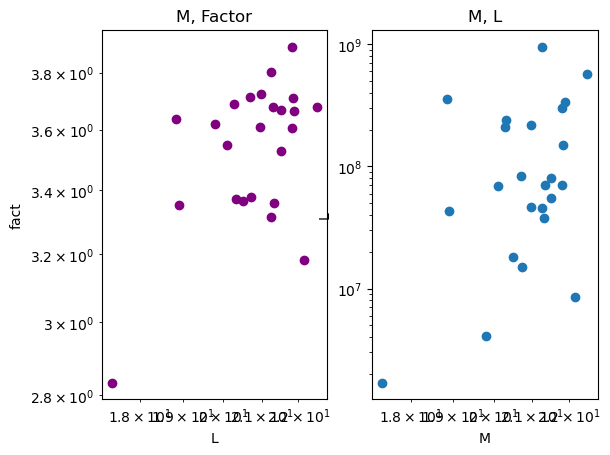

In [300]:
spiral = data.copy()
ellips = data.copy()

i=0
while i < len(spiral):
    if spiral[i]["Type"][0].upper() != 'S':
        spiral.remove_row(i)  
        i -= 1
    i += 1
i=0
while i < len(spiral):
    if ellips[i]["Type"][0].upper() != 'E':
        ellips.remove_row(i)  
        i -= 1
    i += 1

#print(ellips)
#print(spiral)

mass_S = np.array(spiral["M_BH (solar masses)"])
sigm_S = np.array(spiral["sigma_e (km/s)"])
dist_S = np.array(spiral["Dist (million parsecs)"])
m0vt_S = np.array(spiral["M0 V.T"])

mass_E = np.array(ellips["M_BH (solar masses)"])
sigm_E = np.array(ellips["sigma_e (km/s)"])
dist_E = np.array(ellips["Dist (million parsecs)"])
m0vt_E = np.array(ellips["M0 V.T"])

fact_S = np.log(mass_S)/np.log(sigm_S)
fact_E = np.log(mass_E)/np.log(sigm_E)

#fact_S = sigm_S
#fact_E = sigm_E

#plt.plot(fact_S, dist_S)

#plt.plot(dist_E, fact_E, marker='o')
#plt.scatter(-m0vt_E, fact_E)

fig, axs = plt.subplots(1, 2)  # 1 Zeile, 2 Spalten

# Erster Plot
axs[0].scatter(-m0vt_S, fact_S, color="purple")

axs[0].set_title('M, Factor')
axs[0].set_xlabel('L')
axs[0].set_ylabel('fact')

axs[0].set_xscale("log")
axs[0].set_yscale("log")

# Zweiter Plot
axs[1].scatter(-m0vt_S, mass_S)
axs[1].set_title('M, L')
axs[1].set_xlabel('M')
axs[1].set_ylabel('L')

axs[1].set_xscale("log")
axs[1].set_yscale("log")

"""
plt.scatter(-m0vt_S, fact_S, color="purple")
plt.scatter(-m0vt_S, mass_S, color="red")

plt.xlabel('dist')
plt.ylabel('fact')

plt.xscale('log')
plt.yscale('log')
"""
plt.show()